In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

hechos = pd.read_parquet('../archivos/datos_limpios/hechos.parquet')
victimas = pd.read_parquet('../archivos/datos_limpios/victimas.parquet')

In [35]:
hechos.head(2)

,Id_hecho,N_victimas,Fecha,Año,Mes,Hora,Tipo_de_calle,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,4.0,AVENIDA,PIEDRA BUENA AV.,1,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,1.0,GRAL PAZ,"PAZ, GRAL. AV.",1,9,-58.50877521,-34.66977709,AUTO,PASAJEROS


In [34]:
victimas['Id_hecho'].value_counts()

Id_hecho
2017-0035    3
2017-0108    2
2018-0098    2
2018-0038    2
2020-0063    2
            ..
2017-0118    1
2017-0120    1
2017-0123    1
2017-0124    1
2017-0109    1
Name: count, Length: 696, dtype: int64

In [20]:
hechos.describe(include='all')

,Id_hecho,N_victimas,Fecha,Año,Mes,Hora,Tipo_de_calle,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
count,695,695.000000,695,695.000000,695.000000,694.000000,695,695,695.000000,695.000000,695,695,686,673
unique,695,NaN,NaN,NaN,NaN,NaN,4,278,NaN,NaN,605,605,9,9
top,2021-0097,NaN,NaN,NaN,NaN,NaN,AVENIDA,"PAZ, GRAL. AV.",NaN,NaN,.,.,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,429,57,NaN,NaN,11,11,295,204
mean,NaN,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,11.645533,NaN,NaN,0.755396,7.435971,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,6.000000,NaN,NaN,1.000000,4.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,11.000000,NaN,NaN,1.000000,8.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,17.000000,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,23.000000,NaN,NaN,1.000000,15.000000,NaN,NaN,NaN,NaN


**Verifico que los valores N_victimas sean del tipo int para poder realizar una suma por cada año**

In [21]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id_hecho       695 non-null    object        
 1   N_victimas     695 non-null    int64         
 2   Fecha          695 non-null    datetime64[ns]
 3   Año            695 non-null    int64         
 4   Mes            695 non-null    int64         
 5   Hora           694 non-null    float64       
 6   Tipo_de_calle  695 non-null    object        
 7   Calle          695 non-null    object        
 8   Cruce          695 non-null    int64         
 9   Comuna         695 non-null    int64         
 10  Longitud       695 non-null    object        
 11  Latitud        695 non-null    object        
 12  Victima        686 non-null    object        
 13  Acusado        673 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 81.4+ KB


quiero ir verificando por diferentes franjas de tiempo: anual, mensual y diario

In [22]:
victimas_por_año = hechos[['N_victimas','Año']]
victimas_por_año = victimas_por_año.groupby('Año').sum().reset_index()
victimas_por_año.head()

,Año,N_victimas
0,2016,145
1,2017,140
2,2018,149
3,2019,104
4,2020,81


+ Grafico la cantidad de muertes por año, chequeo si en 2019 y 2020 hay un descenso, debido al covid y las restricciones de circulacion

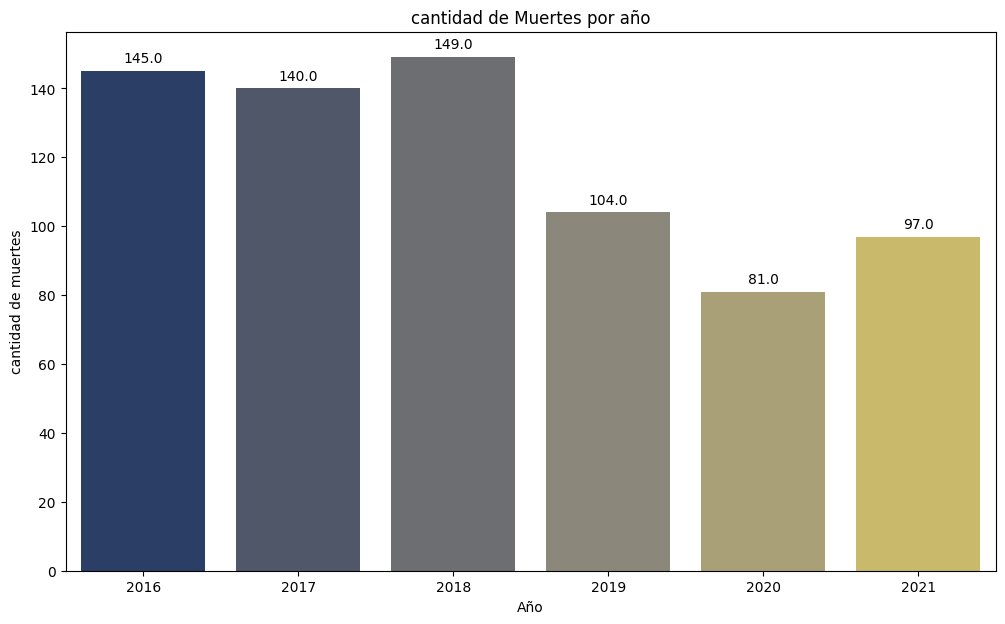

In [23]:
plt.figure(figsize=(12, 7))
plt.title('cantidad de Muertes por año')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Año', y='N_victimas', data=victimas_por_año, palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [24]:
victimas_por_mes = hechos[['N_victimas','Año','Mes']]
victimas_por_mes = victimas_por_mes.groupby(['Año','Mes']).sum().reset_index()
victimas_por_mes

,Año,Mes,N_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


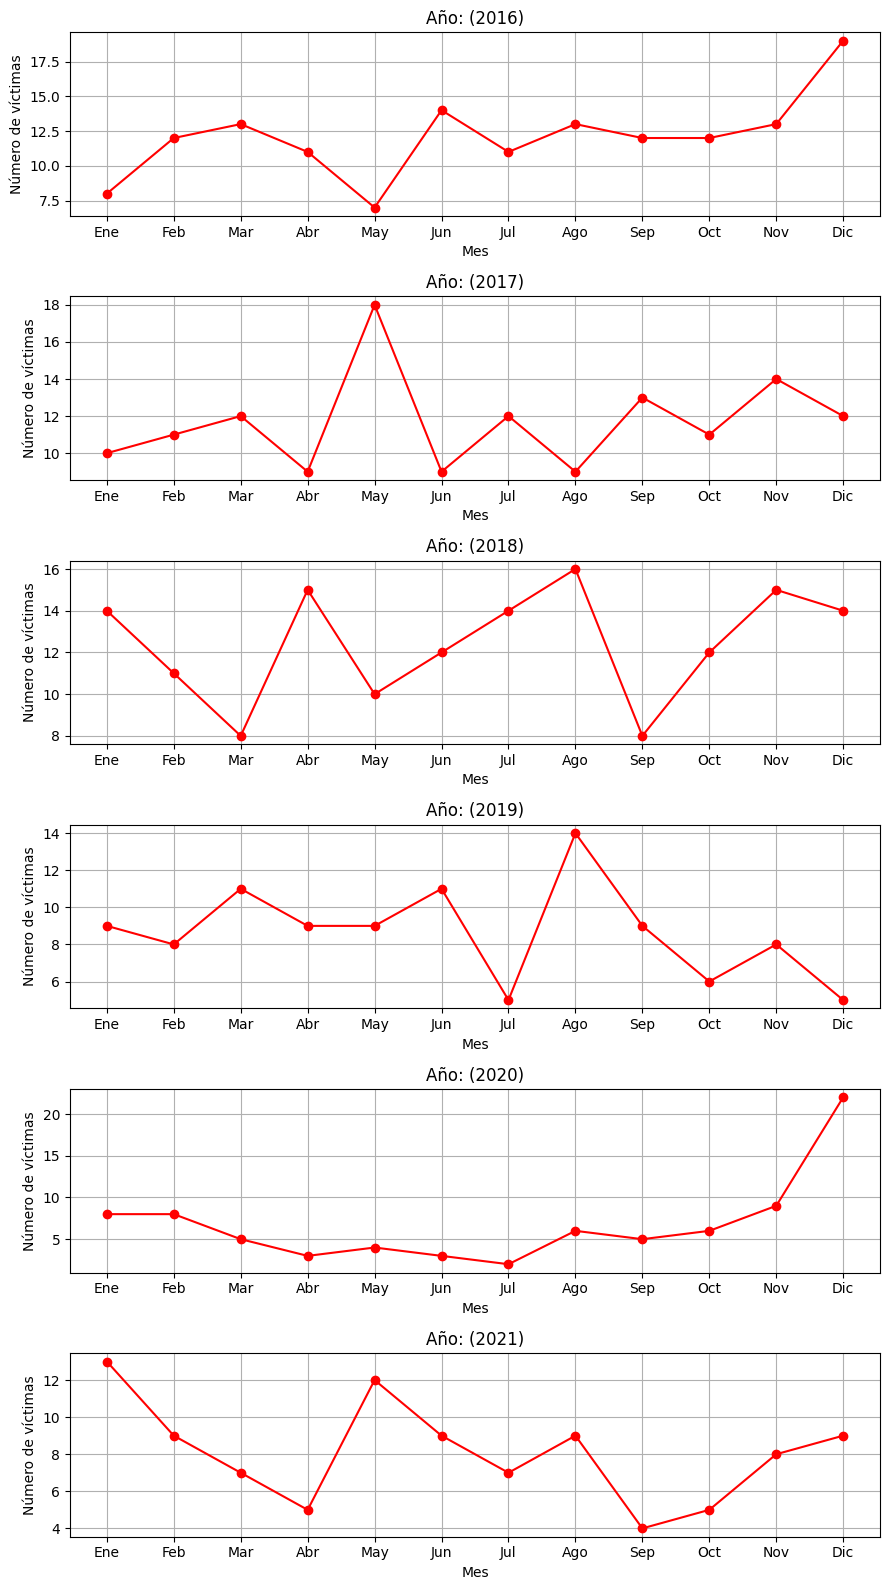

In [25]:
anios = victimas_por_mes['Año'].unique()  # Puedes agregar más años a esta lista

# Crear una figura con subplots para cada año
fig, axes = plt.subplots(len(anios), 1, figsize=(9, 16))  # Ajustar el tamaño según sea necesario

# Recorrer cada año y crear un gráfico lineplot en su subplot correspondiente
for i, anio in enumerate(anios):
    datos_anio = victimas_por_mes[victimas_por_mes["Año"] == anio]  # Filtrar datos por año
    ax = axes[i]  # Obtener el subplot actual

    # Crear el lineplot
    ax.plot(datos_anio["Mes"], datos_anio["N_victimas"], label=str(anio), marker='o', color='red')

    # Se agregan algunas etiquetas para identificar los puntos, los X e Y y el titulo
    ax.set_title(f"Año: ({anio})")
    ax.set_xlabel("Mes")
    ax.set_ylabel("Número de víctimas")
    #cantidad de divisiones que quiero tener en Mes
    ax.set_xticks(range(1, 13))
    #etiquetas en las divisiones con los nombres de los meses para mayor comprension
    ax.set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
    ax.grid(True)

# Ajustar el layout de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

+ un dato de gran relevancia es el numero de victimas por mes que supera a todo el resto en el año 2020, cuando se vuelve a disparar la cantidad de muertes en diciembre, dando el numero de victimas fatales mas grande dadas en un mes.
+ por otro lado, a excepcion del 2018 marzo y abril suelen tener una reduccion de accidentes

In [26]:
victimas_por_dia = hechos[['N_victimas','Fecha','Año']]
victimas_por_dia['Fecha'] = victimas_por_dia['Fecha'].dt.day_name()
victimas_por_dia.rename(columns={'Fecha':'Dia'},inplace=True)
victimas_por_dia = victimas_por_dia.groupby(['Año','Dia']).sum().reset_index()

In [27]:
#utilizamos un diccionario para llamar en el replace y hacer la traduccion de los dias al español
dias_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
victimas_por_dia['Dia'] = victimas_por_dia['Dia'].replace(dias_ingles_espanol)
victimas_por_dia.head(7)

,Año,Dia,N_victimas
0,2016,Viernes,18
1,2016,Lunes,22
2,2016,Sábado,22
3,2016,Domingo,30
4,2016,Jueves,10
5,2016,Martes,16
6,2016,Miércoles,27


In [28]:
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
victimas_por_dia['Dia'] = pd.Categorical(victimas_por_dia['Dia'], categories=dias_orden, ordered=True)
victimas_por_dia = victimas_por_dia.sort_values(by=['Dia','Año']).reset_index(drop=True)

en este caso quiero utilizar barras agrupadas para chequear si existe algun patron entre los dias de semana y los fines de semana de cada año (2016-2021)

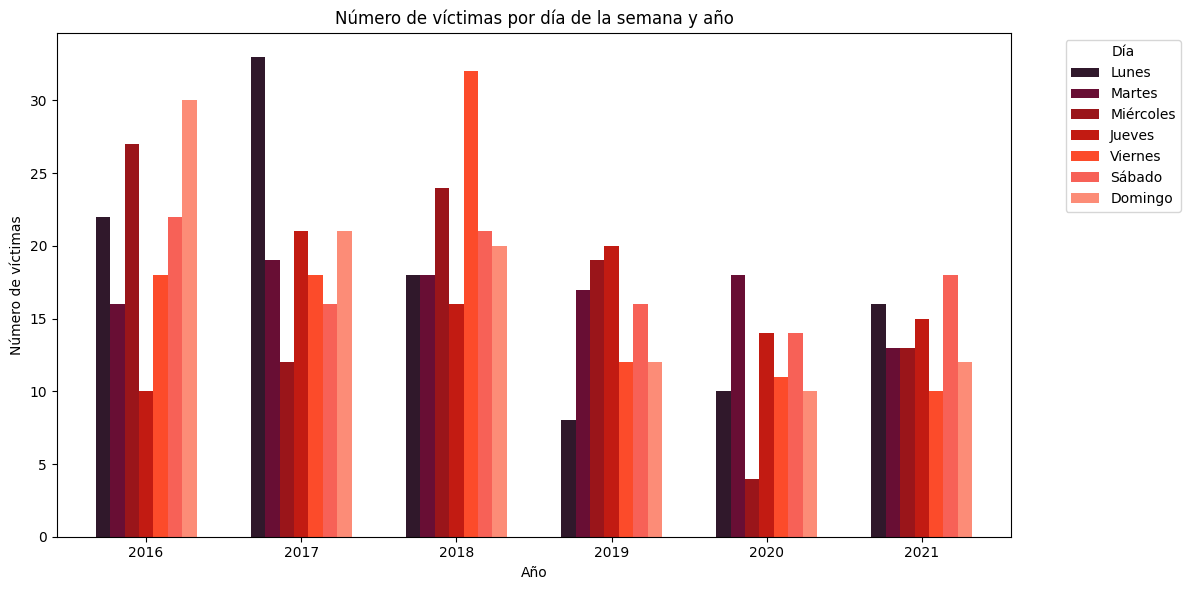

In [29]:
pivot_table = victimas_por_dia.pivot(index='Año', columns='Dia', values='N_victimas')

colors = ['#30182b', '#680e34', '#9a151a', '#c21b12', '#fc4b2a', '#f76157', '#fc8c77']

pivot_table.plot(kind='bar', figsize=(12, 6), width=0.65,color=colors)

plt.title('Número de víctimas por día de la semana y año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=0)

plt.legend(title='Día', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

queria ver si habia un patron que se repita entre los fines de semana y los dias habiles pero no encontre entre el conjunto de años constancia de estos

In [30]:
total_dias = victimas_por_dia[['Dia', 'N_victimas']]
total_dias = total_dias.groupby('Dia').sum().reset_index()
total_dias

,Dia,N_victimas
0,Lunes,107
1,Martes,101
2,Miércoles,99
3,Jueves,96
4,Viernes,101
5,Sábado,107
6,Domingo,105


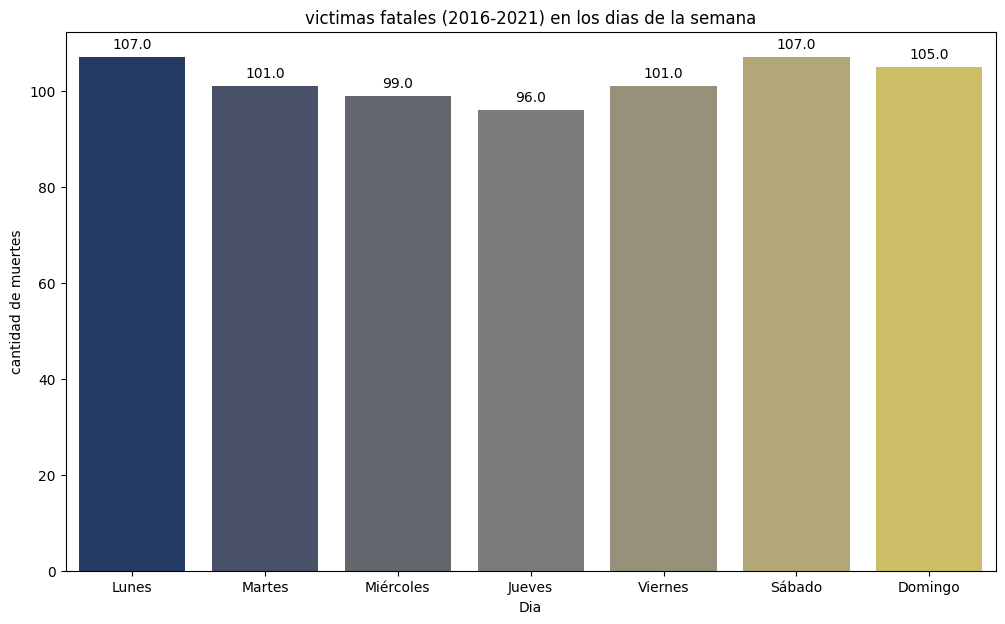

In [31]:
plt.figure(figsize=(12, 7))
plt.title('victimas fatales (2016-2021) en los dias de la semana')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Dia', y='N_victimas', data=total_dias, palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

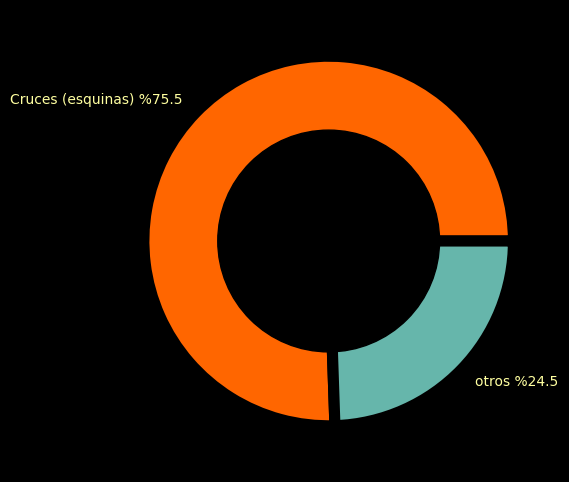

In [32]:
cruces = hechos[hechos['Cruce']==1].shape[0]
otros = hechos[hechos['Cruce']==0].shape[0]
total = hechos['Cruce'].shape[0]

porcentaje_cruces = cruces*100/total
porcentaje_otros = otros*100/total
porcentaje_cruces = "{:.1f}".format(porcentaje_cruces)
porcentaje_otros = "{:.1f}".format(porcentaje_otros)

nombre_partes = [f'Cruces (esquinas) %{porcentaje_cruces}', f'otros %{porcentaje_otros}']
total = [cruces,otros]

figura = plt.figure(figsize=(12,6))
figura.patch.set_facecolor('black')
 
plt.rcParams['text.color'] = '#ffffa0'
circulo = plt.Circle( (0,0), 0.6, color='black')
 
plt.pie(total, labels=nombre_partes, wedgeprops = {'linewidth':8,'edgecolor':'black'},colors=['#ff6600','#66b6ab'])
p=plt.gcf()
p.gca().add_artist(circulo)
plt.show()

Mayoria de siniestros viales en las esquinas. esto puede ser interesante para chequear en conjunto despues con un mapa y ver cual o cuales esquinas son las que tienen mayor concentracion de accidentes

<function matplotlib.pyplot.show(close=None, block=None)>

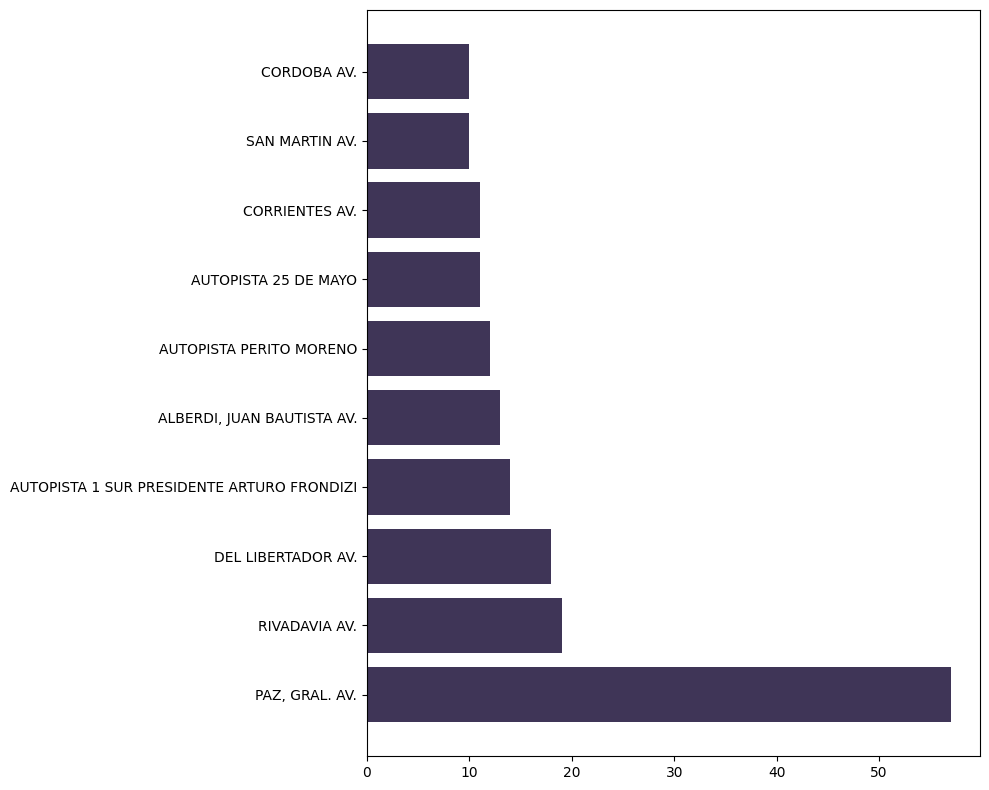

In [33]:
#usamos solo la columna 'Calle'
calles = hechos['Calle']
#realizamos un conteo de la cantidad de ocasiones en las que los accidentes ocurrieron en una determinada calle
calles = calles.value_counts()
#al ser mas de 200 resultados realizamos un filtrado para ver aquellas que tienen mayor cantidad de accidentes (en este caso + o igual a 10)
calles = calles[calles>=10]

plt.figure(figsize=(10,8))
plt.barh(y=calles.keys(), width=calles.values, color='#3f3557')
plt.tight_layout()
plt.show

ahora tengo una idea en que calles son frecuentes los accidentes

Ahora quiero realizar una comparativa entre los moviles que usaban tanto las victimas como los acusados

In [84]:
movil_victima = hechos['Victima'].value_counts().reset_index().rename(columns={'Victima':'Movil','count':'Victimas'})
movil_acusado = hechos['Acusado'].value_counts().reset_index().rename(columns={'Acusado':'Movil','count':'Acusados'})
moviles = movil_victima.merge(movil_acusado, on='Movil',how='outer')
moviles = moviles.fillna(0)
#me aseguro que hayan quedado bien cargados los datos
moviles

,Movil,Victimas,Acusados
0,AUTO,83.0,204.0
1,BICICLETA,29.0,7.0
2,CARGAS,7.0,146.0
3,MOTO,295.0,57.0
4,MOVIL,2.0,0.0
5,MULTIPLE,0.0,17.0
6,OBJETO FIJO,1.0,62.0
7,OTRO,0.0,6.0
8,PASAJEROS,5.0,173.0
9,PEATON,263.0,0.0


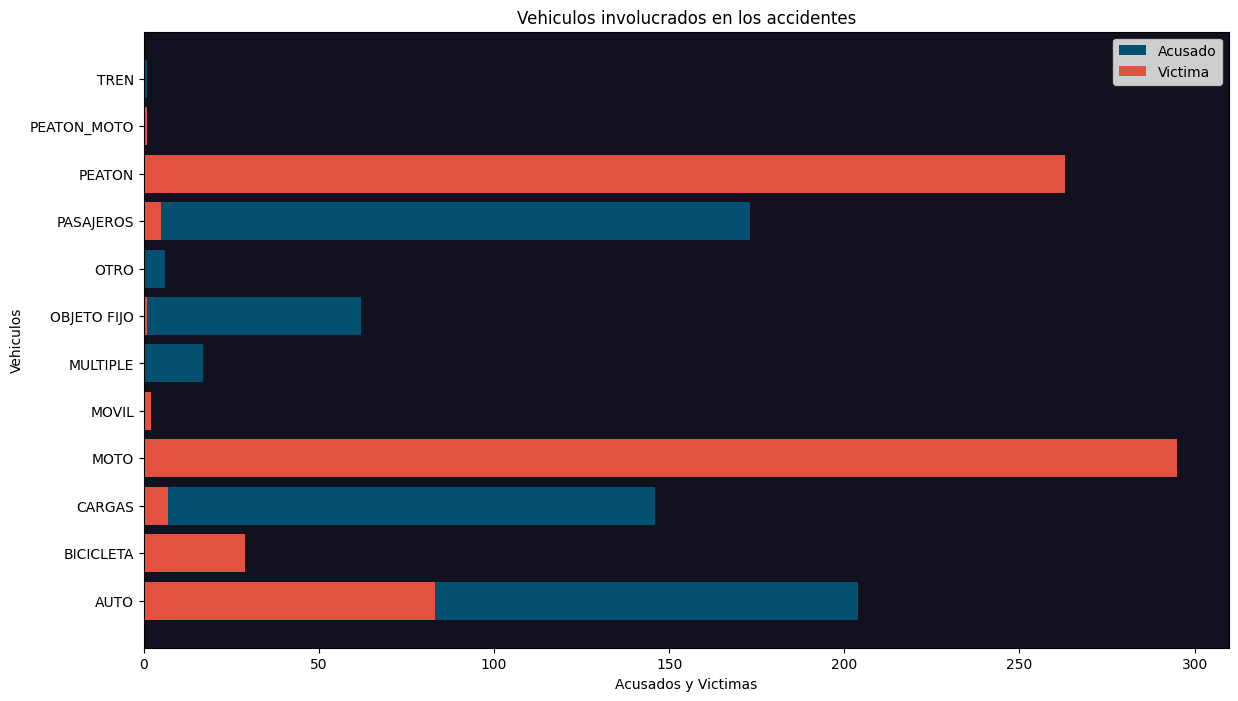

In [148]:
fig, ax = plt.subplots(figsize=(14,8))

plt.barh(moviles['Movil'],moviles['Acusados'],color='#045071',label='Acusado')
plt.barh(moviles['Movil'],moviles['Victimas'],color='#e35241',label='Victima')

ax.set_facecolor('#11111f')
ax.set_title('Vehiculos involucrados en los accidentes', color='#000')
ax.set_ylabel('Vehiculos')
ax.set_xlabel('Acusados y Victimas')
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('#000')

plt.show()


me llama la atencion la cantidad de acusados que hay siendo pasajeros, tengo entendido por el diccionario de datos que son personas que estan en el interior de un transsporte publico y/o omnibus de largas distancias

In [37]:
horas_accidentes = hechos['Hora'].value_counts()
horas_accidentes

Hora
7.0     41
6.0     40
9.0     36
5.0     35
14.0    33
12.0    32
18.0    31
10.0    31
8.0     31
16.0    30
17.0    30
22.0    30
19.0    30
21.0    29
23.0    28
11.0    27
3.0     26
20.0    25
15.0    25
1.0     24
4.0     23
0.0     23
2.0     17
13.0    17
Name: count, dtype: int64